# Credit Risk Assessment – EDA & Preprocessing

**Name:** Tanbi Ghosh  
**Student ID:** iitp_aiml_2506380  
**Trimester:** 2  
**Project:** End-of-Term ML Project  
**Notebook:** 01 – EDA & Preprocessing


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [ ]:
data_path = "/content/drive/MyDrive/T2_Project_Tanbi/Data/german_credit_data.csv"

df = pd.read_csv(data_path)
df.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,56,male,1,own,little,moderate,6745,22,car,good
1,69,female,2,free,moderate,moderate,10437,70,car,good
2,46,male,3,own,quite rich,little,9763,8,car,good
3,32,female,1,own,moderate,little,18964,70,radio/TV,bad
4,60,male,2,own,moderate,little,17650,14,domestic appliances,good


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   915 non-null    object
 5   Checking account  905 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [ ]:
df.describe()


,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,46.247000,1.306000,9943.912000,36.810000
std,16.288072,0.901763,5626.476201,19.334418
min,18.000000,0.000000,298.000000,4.000000
25%,33.000000,1.000000,5021.250000,21.000000
50%,46.000000,1.000000,9814.000000,36.000000
75%,60.250000,2.000000,14785.500000,53.000000
max,74.000000,3.000000,19893.000000,71.000000


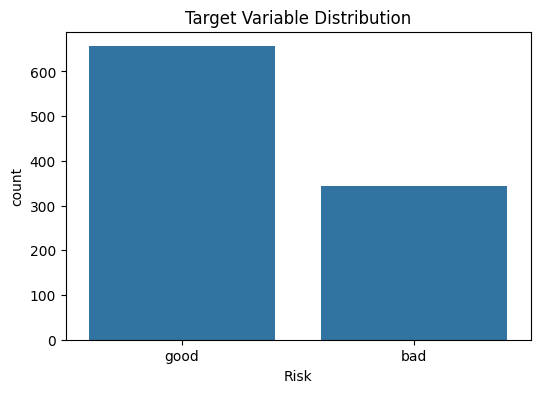

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Risk", data=df)
plt.title("Target Variable Distribution")

plt.savefig(
    "/content/drive/MyDrive/T2_Project_Tanbi/Visualizations/target_distribution.png"
)
plt.show()


In [ ]:
df.isnull().sum()


,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,85
Checking account,95
Credit amount,0
Duration,0
Purpose,0
Risk,0


In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df.isnull().sum()


,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,0
Checking account,0
Credit amount,0
Duration,0
Purpose,0
Risk,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,56,1,1,1,0,1,6745,22,1,1
1,69,0,2,0,1,1,10437,70,1,1
2,46,1,3,1,2,0,9763,8,1,1
3,32,0,1,1,1,0,18964,70,5,0
4,60,1,2,1,1,0,17650,14,2,1


In [ ]:
X = df.drop('Risk', axis=1)
y = df['Risk']

X.shape, y.shape


((1000, 9), (1000,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((800, 9), (200, 9))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
X_train_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_df  = pd.DataFrame(X_test_scaled,  columns=X.columns)

X_train_df.to_csv(
    "/content/drive/MyDrive/T2_Project_Tanbi/Data/X_train.csv",
    index=False
)
X_test_df.to_csv(
    "/content/drive/MyDrive/T2_Project_Tanbi/Data/X_test.csv",
    index=False
)

print("X_train.csv and X_test.csv saved successfully!")


X_train.csv and X_test.csv saved successfully!


In [5]:
%pip install ucimlrepo


In [6]:
# =============================
# ONE-TIME DATA FETCH & SAVE
# =============================

from ucimlrepo import fetch_ucirepo
import pandas as pd
import os

BASE_PATH = "/content/drive/MyDrive/T2_Project_Tanbi"
DATA_PATH = f"{BASE_PATH}/Data"

# Ensure Data folder exists
os.makedirs(DATA_PATH, exist_ok=True)

# Fetch dataset from UCI
statlog_german_credit_data = fetch_ucirepo(id=144)

# Combine features and target
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

df = pd.concat([X, y], axis=1)

# Save dataset locally
df.to_csv(f"{DATA_PATH}/german_credit_data.csv", index=False)

print("✅ Dataset fetched and saved successfully")
print("df shape:", df.shape)


✅ Dataset fetched and saved successfully
df shape: (1000, 21)


In [7]:
df = pd.read_csv("/content/drive/MyDrive/T2_Project_Tanbi/Data/german_credit_data.csv")


In [10]:
# =============================
# ENSURE TARGET COLUMN EXISTS
# =============================

# If column is still named 'class', rename it
if 'class' in df.columns:
    df = df.rename(columns={'class': 'Target'})

# Map target values if not already done
if set(df['Target'].unique()) == {1, 2}:
    df['Target'] = df['Target'].map({1: 0, 2: 1})

print("✅ Target column ready")
print("Target value counts:")
print(df['Target'].value_counts())


✅ Target column ready
Target value counts:
Target
0    700
1    300
Name: count, dtype: int64


In [11]:
# =============================
# TRAIN - TEST SPLIT
# =============================

from sklearn.model_selection import train_test_split

X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("✅ Data split completed")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


✅ Data split completed
X_train shape: (800, 20)
X_test shape: (200, 20)


In [12]:
# =============================
# SAVE TRAIN TEST SPLITS
# =============================

X_train.to_csv(f"{DATA_PATH}/X_train.csv", index=False)
X_test.to_csv(f"{DATA_PATH}/X_test.csv", index=False)
y_train.to_csv(f"{DATA_PATH}/y_train.csv", index=False)
y_test.to_csv(f"{DATA_PATH}/y_test.csv", index=False)

print("✅ Train/Test splits saved successfully")


✅ Train/Test splits saved successfully


In [14]:
!rm -rf /content/drive


In [15]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [16]:
BASE_PATH = "/content/drive/MyDrive/T2_Project_Tanbi"
DATA_PATH = f"{BASE_PATH}/Data"
MODEL_PATH = f"{BASE_PATH}/Models"


In [17]:
import os
print(os.listdir(DATA_PATH))


['german_credit_data.csv', 'X_train.csv', 'X_test.csv', 'y_test.csv', 'y_train.csv']


In [19]:
print(df.columns.tolist())


['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5', 'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10', 'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14', 'Attribute15', 'Attribute16', 'Attribute17', 'Attribute18', 'Attribute19', 'Attribute20', 'Target']


In [20]:
df = df.rename(columns={
    'Attribute1': 'Checking_Account_Status',
    'Attribute2': 'Duration',
    'Attribute3': 'Credit_History',
    'Attribute4': 'Purpose',
    'Attribute5': 'Credit_Amount',
    'Attribute6': 'Savings_Account',
    'Attribute7': 'Employment_Duration',
    'Attribute8': 'Installment_Rate',
    'Attribute9': 'Personal_Status_Sex',
    'Attribute10': 'Other_Debtors',
    'Attribute11': 'Residence_Duration',
    'Attribute12': 'Property',
    'Attribute13': 'Age',
    'Attribute14': 'Other_Installment_Plans',
    'Attribute15': 'Housing',
    'Attribute16': 'Existing_Credits',
    'Attribute17': 'Job',
    'Attribute18': 'Num_Dependents',
    'Attribute19': 'Telephone',
    'Attribute20': 'Foreign_Worker',
    'class': 'Target'
})


In [21]:
# =============================
# COLUMN RENAMING (MANDATORY)
# =============================

df = df.rename(columns={
    'Attribute1': 'Checking_Account_Status',
    'Attribute2': 'Duration',
    'Attribute3': 'Credit_History',
    'Attribute4': 'Purpose',
    'Attribute5': 'Credit_Amount',
    'Attribute6': 'Savings_Account',
    'Attribute7': 'Employment_Duration',
    'Attribute8': 'Installment_Rate',
    'Attribute9': 'Personal_Status_Sex',
    'Attribute10': 'Other_Debtors',
    'Attribute11': 'Residence_Duration',
    'Attribute12': 'Property',
    'Attribute13': 'Age',
    'Attribute14': 'Other_Installment_Plans',
    'Attribute15': 'Housing',
    'Attribute16': 'Existing_Credits',
    'Attribute17': 'Job',
    'Attribute18': 'Num_Dependents',
    'Attribute19': 'Telephone',
    'Attribute20': 'Foreign_Worker'
})

print("✅ Columns renamed successfully")
print(df.columns.tolist())


✅ Columns renamed successfully
['Checking_Account_Status', 'Duration', 'Credit_History', 'Purpose', 'Credit_Amount', 'Savings_Account', 'Employment_Duration', 'Installment_Rate', 'Personal_Status_Sex', 'Other_Debtors', 'Residence_Duration', 'Property', 'Age', 'Other_Installment_Plans', 'Housing', 'Existing_Credits', 'Job', 'Num_Dependents', 'Telephone', 'Foreign_Worker', 'Target']


In [22]:
plt.savefig(f"{BASE_PATH}/Visualizations/numerical_feature_distributions.png", dpi=300)


<Figure size 640x480 with 0 Axes>

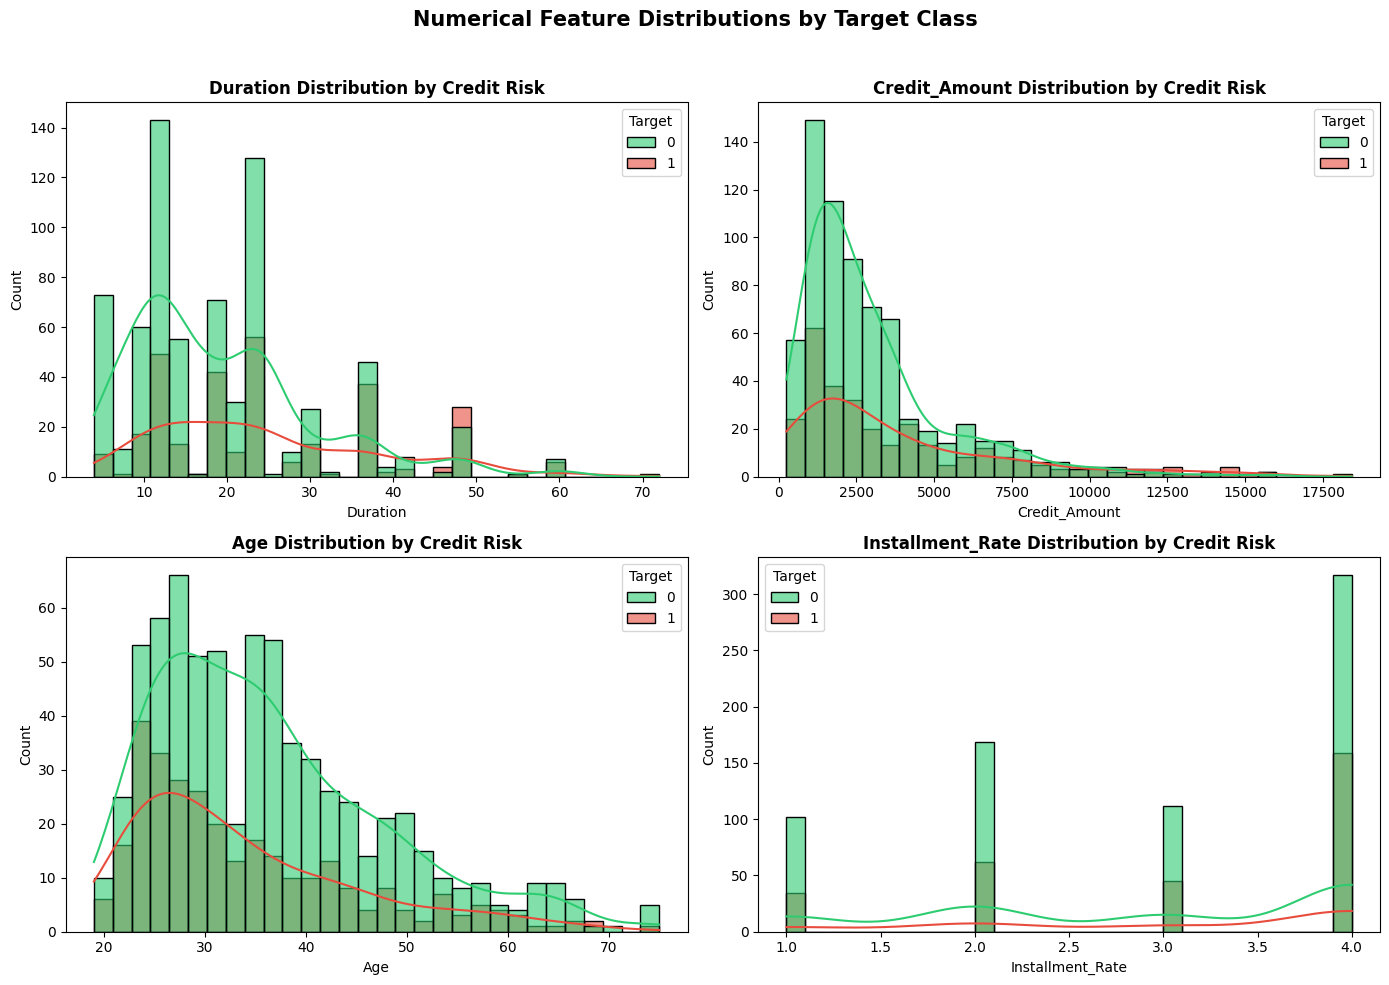

In [23]:
# =============================
# NUMERICAL FEATURE DISTRIBUTIONS BY TARGET (FIXED)
# =============================

import matplotlib.pyplot as plt
import seaborn as sns

num_features = [
    'Duration',
    'Credit_Amount',
    'Age',
    'Installment_Rate'
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, feature in enumerate(num_features):
    ax = axes[i // 2, i % 2]

    sns.histplot(
        data=df,
        x=feature,
        hue='Target',
        kde=True,
        bins=30,
        palette={0: '#2ecc71', 1: '#e74c3c'},
        alpha=0.6,
        ax=ax
    )

    ax.set_title(f'{feature} Distribution by Credit Risk', fontsize=12, fontweight='bold')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

# Overall title
fig.suptitle(
    'Numerical Feature Distributions by Target Class',
    fontsize=15,
    fontweight='bold'
)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [24]:
print(df['Target'].value_counts())


Target
0    700
1    300
Name: count, dtype: int64


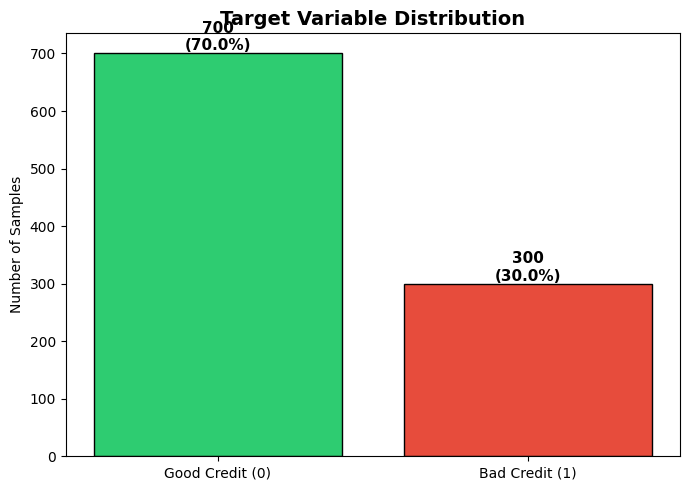

In [25]:
# =============================
# TARGET VARIABLE DISTRIBUTION
# =============================

import matplotlib.pyplot as plt

counts = df['Target'].value_counts().sort_index()

labels = ['Good Credit (0)', 'Bad Credit (1)']
colors = ['#2ecc71', '#e74c3c']

fig, ax = plt.subplots(figsize=(7, 5))

bars = ax.bar(labels, counts.values, color=colors, edgecolor='black')

# Add count + percentage on bars
for bar, count in zip(bars, counts.values):
    ax.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f'{count}\n({count/len(df)*100:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

ax.set_title('Target Variable Distribution', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Samples')

plt.tight_layout()
plt.show()


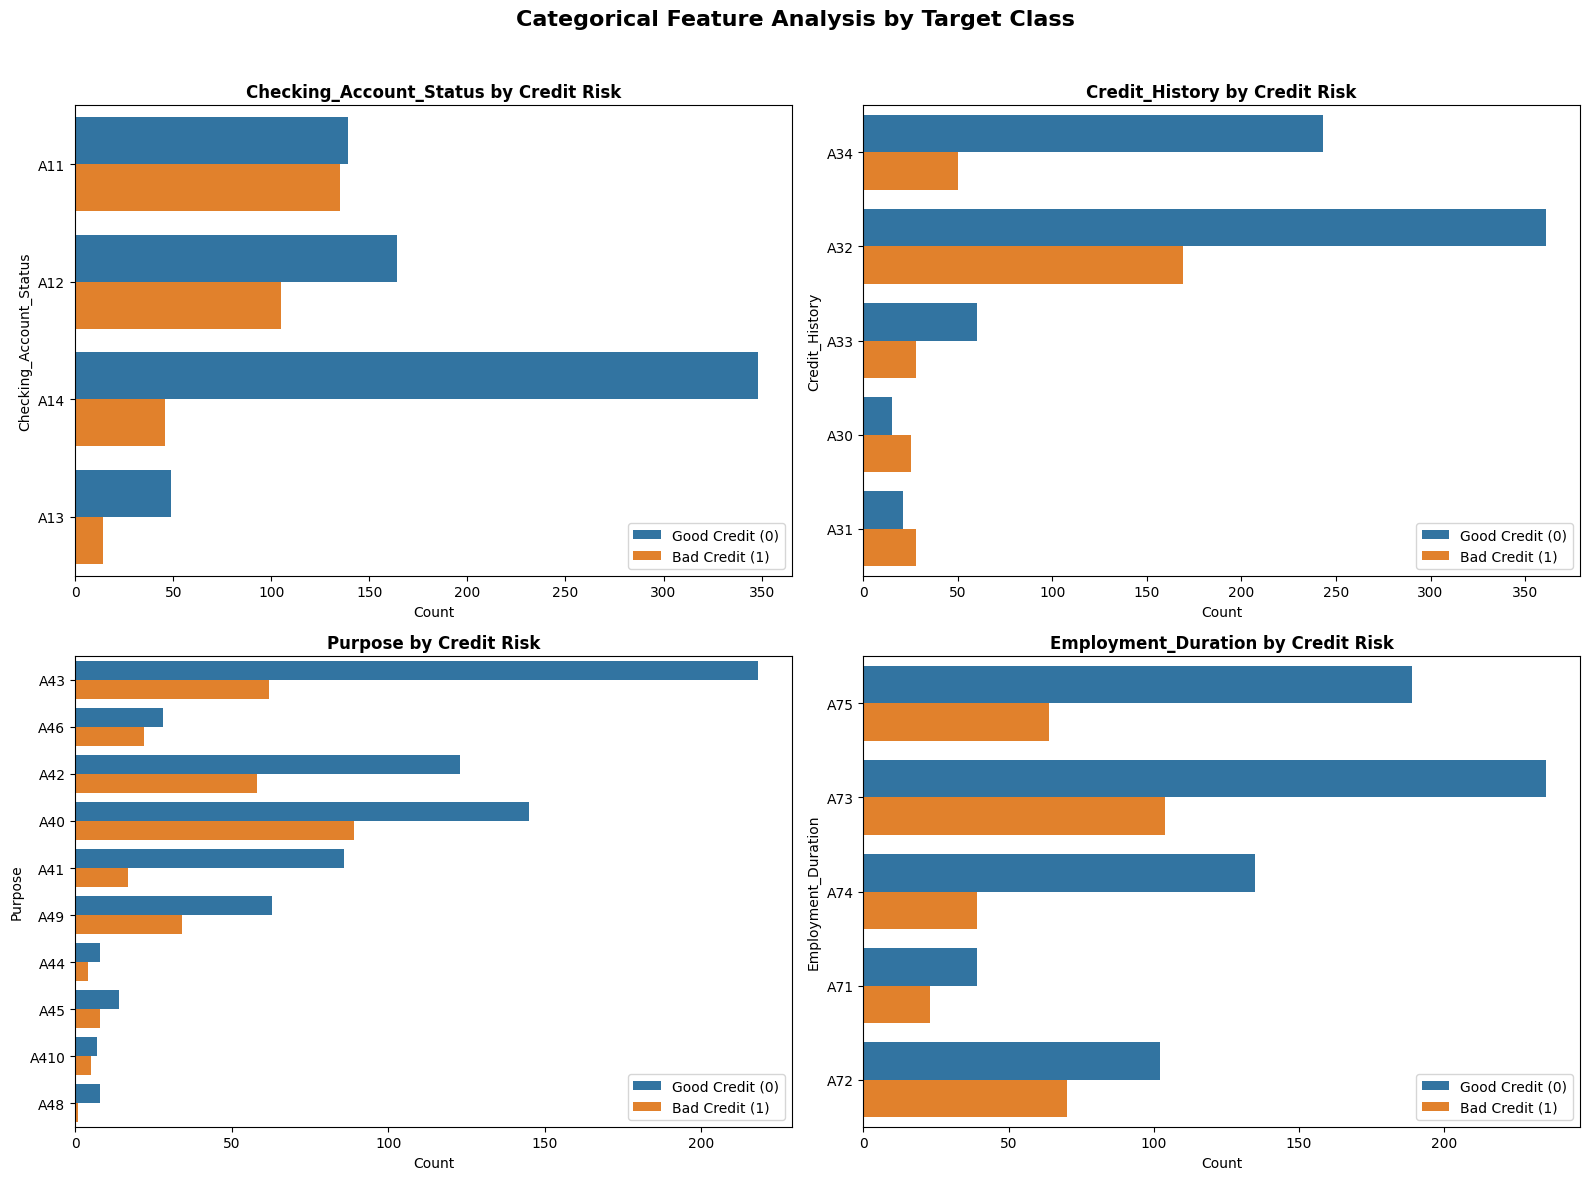

In [27]:
# =============================
# CATEGORICAL FEATURE ANALYSIS BY TARGET (UPDATED COLORS)
# =============================

import matplotlib.pyplot as plt
import seaborn as sns

cat_features = [
    'Checking_Account_Status',
    'Credit_History',
    'Purpose',
    'Employment_Duration'
]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for i, feature in enumerate(cat_features):
    ax = axes[i // 2, i % 2]

    sns.countplot(
        data=df,
        y=feature,
        hue='Target',
        palette={0: '#1f77b4', 1: '#ff7f0e'},  # 👈 changed colors
        ax=ax
    )

    ax.set_title(f'{feature} by Credit Risk', fontsize=12, fontweight='bold')
    ax.set_xlabel('Count')
    ax.set_ylabel(feature)
    ax.legend(['Good Credit (0)', 'Bad Credit (1)'], loc='lower right')

fig.suptitle(
    'Categorical Feature Analysis by Target Class',
    fontsize=16,
    fontweight='bold'
)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [29]:
!pip install optbinning


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.8/214.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 23.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.6
    Uninstalling protobuf-5.29.6:
      Successfully uninstalled protobuf-5.29.6
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.15.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 5.26.1 which is incompatible.
grain 0.2.15 requires protobuf>=5.28.3, but you have protobuf 5.26.1 which is incompatib

In [30]:
from optbinning import OptimalBinning
print("✅ optbinning imported successfully")


✅ optbinning imported successfully


In [31]:
from optbinning import OptimalBinning


In [32]:
# =============================
# OPTIMAL BINNING ANALYSIS FOR KEY NUMERICAL FEATURES
# =============================

from optbinning import OptimalBinning

# Numerical features selected for binning
binning_features = [
    'Duration',
    'Credit_Amount',
    'Age'
]

print("📊 Optimal Binning Analysis for Key Numerical Features")
print("=" * 80)

for feature in binning_features:
    print(f"\n🔍 Feature: {feature}")
    print("-" * 60)

    optb = OptimalBinning(
        name=feature,
        dtype="numerical",
        solver="cp",
        monotonic_trend="auto"
    )

    # Fit binning
    optb.fit(df[feature], df['Target'])

    # Build binning table
    binning_table = optb.binning_table.build()

    # Display table in notebook
    display(binning_table)

    # Extract Information Value (IV)
    iv = binning_table.loc['Totals', 'IV']

    # IV interpretation
    if iv >= 0.3:
        strength = "Strong predictor"
    elif iv >= 0.1:
        strength = "Medium predictor"
    elif iv >= 0.02:
        strength = "Weak predictor"
    else:
        strength = "Not useful"

    print(f"\n📈 Information Value (IV): {iv:.4f} → {strength}")
    print("=" * 80)


📊 Optimal Binning Analysis for Key Numerical Features

🔍 Feature: Duration
------------------------------------------------------------


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 8.50)",94,0.094,84,10,0.106383,1.280934,0.111014,0.013000
1,"[8.50, 11.50)",86,0.086,69,17,0.197674,0.553595,0.023198,0.002863
2,"[11.50, 15.50)",251,0.251,189,62,0.247012,0.267315,0.016930,0.002110
3,"[15.50, 26.50)",340,0.340,231,109,0.320588,-0.096228,0.003208,0.000401
4,"[26.50, 34.50)",59,0.059,39,20,0.338983,-0.179468,0.001966,0.000245
5,"[34.50, 43.50)",100,0.100,58,42,0.420000,-0.524524,0.029973,0.003704
6,"[43.50, inf)",70,0.070,30,40,0.571429,-1.13498,0.102689,0.012189
7,Special,0,0.000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1000,1.000,700,300,0.300000,,0.288977,0.034512



📈 Information Value (IV): 0.2890 → Medium predictor

🔍 Feature: Credit_Amount
------------------------------------------------------------


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 954.50)",107,0.107,72,35,0.327103,-0.12598,0.001740,0.000217
1,"[954.50, 1373.00)",146,0.146,101,45,0.308219,-0.03884,0.000222,0.000028
2,"[1373.00, 3446.50)",427,0.427,323,104,0.243560,0.285964,0.032818,0.004088
3,"[3446.50, 3913.50)",60,0.060,55,5,0.083333,1.550597,0.095989,0.010925
4,"[3913.50, 6322.50)",127,0.127,79,48,0.377953,-0.349051,0.016455,0.002047
5,"[6322.50, 7839.50)",58,0.058,36,22,0.379310,-0.354821,0.007772,0.000966
6,"[7839.50, inf)",75,0.075,34,41,0.546667,-1.034509,0.091135,0.010910
7,Special,0,0.000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1000,1.000,700,300,0.300000,,0.246132,0.029181



📈 Information Value (IV): 0.2461 → Medium predictor

🔍 Feature: Age
------------------------------------------------------------


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 25.50)",190,0.190,110,80,0.421053,-0.528844,0.057921,0.007157
1,"[25.50, 29.50)",181,0.181,124,57,0.314917,-0.070068,0.000901,0.000113
2,"[29.50, 34.50)",177,0.177,122,55,0.310734,-0.05061,0.000458,0.000057
3,"[34.50, 36.50)",79,0.079,67,12,0.151899,0.872488,0.048610,0.005891
4,"[36.50, 38.50)",53,0.053,41,12,0.226415,0.381368,0.007083,0.000880
5,"[38.50, 52.50)",224,0.224,169,55,0.245536,0.275268,0.015992,0.001993
6,"[52.50, inf)",96,0.096,67,29,0.302083,-0.009901,0.000009,0.000001
7,Special,0,0.000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1000,1.000,700,300,0.300000,,0.130974,0.016091



📈 Information Value (IV): 0.1310 → Medium predictor


In [33]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [34]:
BASE_PATH = "/content/drive/MyDrive/T2_Project_Tanbi"
DATA_PATH = f"{BASE_PATH}/Data"

import os
os.makedirs(DATA_PATH, exist_ok=True)

print("✅ Data path ready:", DATA_PATH)


✅ Data path ready: /content/drive/MyDrive/T2_Project_Tanbi/Data


In [35]:
X_train.to_csv(f"{DATA_PATH}/X_train.csv", index=False)
X_test.to_csv(f"{DATA_PATH}/X_test.csv", index=False)
y_train.to_csv(f"{DATA_PATH}/y_train.csv", index=False)
y_test.to_csv(f"{DATA_PATH}/y_test.csv", index=False)

print("✅ Train/Test CSV files saved successfully")


✅ Train/Test CSV files saved successfully


In [36]:
!find /content -name "X_train.csv"


/content/drive/MyDrive/T2_Project_Tanbi/Data/X_train.csv
